## This Notebook was made for fun and nothing serious

In [89]:
# Import Packages
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

In [90]:
# Import Data from (https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows)
df = pd.read_csv("netflix_titles.csv")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [92]:
# There is a significant amount of missing data.
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [93]:
# Transform to Datetime object
df["date_added"] = pd.to_datetime(df["date_added"])

In [94]:
# Create periods of creation for groupping data
df["month_added"] = df["date_added"].dt.to_period("M")
df.groupby("month_added").count()["show_id"]

month_added
2008-01      1
2008-02      1
2009-05      1
2009-11      1
2010-11      1
          ... 
2021-05    132
2021-06    207
2021-07    257
2021-08    178
2021-09    183
Freq: M, Name: show_id, Length: 108, dtype: int64

In [95]:
# The newest addition to netflix in the Data is from 2021 September
df["month_added"].sort_values().tail(11)

0       2021-09
6066        NaT
6174        NaT
6795        NaT
6806        NaT
6901        NaT
7196        NaT
7254        NaT
7406        NaT
7847        NaT
8182        NaT
Name: month_added, dtype: period[M]

In [96]:
df.iloc[7196, :]

show_id                                                     s7197
type                                                      TV Show
title                                                    Kikoriki
director                                                      NaN
cast                                                Igor Dmitriev
country                                                       NaN
date_added                                                    NaT
release_year                                                 2010
rating                                                       TV-Y
duration                                                2 Seasons
listed_in                                                Kids' TV
description     A wacky rabbit and his gang of animal pals hav...
month_added                                                   NaT
Name: 7196, dtype: object

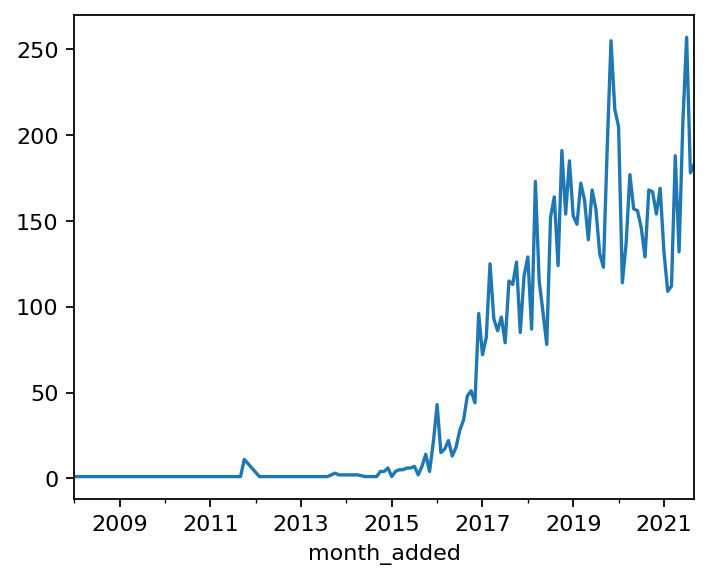

In [97]:
# That is a plot of number of productions added to netflix during recent years.
plt.figure(figsize=(5, 4), dpi=160)
df.groupby("month_added").count()["show_id"].plot()
plt.show()

In [98]:
# Duration if described in different ways for moveis and tv shows,
df["duration"]

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [99]:
# Show the types
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [100]:
#  I'm only interested in movies, So I focuse solely on this data.
movie_df = df[df["type"] == "Movie"]

In [101]:
# convert the data to better format.
movie_df["duration_num"] = movie_df["duration"].dropna().apply(lambda x: int(x.split(" ")[0]))

C:\Users\User\AppData\Local\Temp\ipykernel_10108\1129354272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["duration_num"] = movie_df["duration"].dropna().apply(lambda x: int(x.split(" ")[0]))


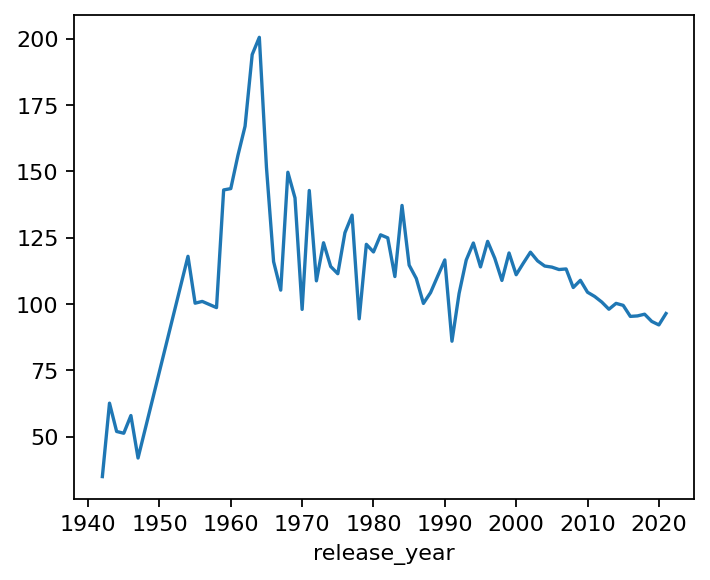

In [102]:
plt.figure(figsize=(5, 4), dpi=160)
movie_df.groupby("release_year")["duration_num"].mean().plot()
plt.show()
# Duration remains stable, which is interesting

In [103]:
# Which countries produce most movies
movie_df["country"].value_counts().head(5)

United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Name: country, dtype: int64

In [104]:
# India produces significantly longer movies
movie_df[movie_df["country"].isin(["India", "United States"])].groupby("country")["duration_num"].mean()

country
India            126.922732
United States     90.629684
Name: duration_num, dtype: float64

### I wanted to check if develepoment of a country impacts movie length.

In [105]:
# Preparation of lists of countries divided by their income level
low = ["Afghanistan",  "Guinea-Bissau",  "Somalia",
"Burkina Faso",  "Korea: Dem. People's Rep  ",  "South Sudan",
"Burundi",  "Liberia",  "Sudan",
"Central African Republic",  "Madagascar",  "Syria",
"Chad",  "Malawi",  "Togo",
"Congo: Dem. Rep",  "Mali",  "Uganda",
"Eritrea",  "Mozambique",  "Yemen: Rep.",
"Ethiopia",  "Niger",  "Zambia",
"Gambia",  "Rwanda",
"Guinea",  "Sierra Leone"]

low_mid = ["Angola",  "India",  "Philippines",
"Algeria",  "Indonesia",  "Samoa",
"Bangladesh",  "Iran",  "São Tomé and Principe",
"Benin",  "Kenya",  "Senegal",
"Bhutan",  "Kiribati",  "Solomon Islands",
"Bolivia",  "Kyrgyz Republic",  "Sri Lanka",
"Cabo Verde",  "Lao PDR",  "Tanzania",
"Cambodia",  "Lebanon",  "Tajikistan",
"Cameroon",  "Lesotho",  "Timor-Leste",
"Comoros",  "Mauritania",  "Tunisia",
"Congo: Rep.",  "Micronesia: Fed. Sts.",  "Ukraine",
"Côte d'Ivoire",  "Mongolia",  "Uzbekistan",
"Djibouti",  "Morocco",  "Vanuatu",
"Egypt",  "Myanmar",  "Vietnam",
"El Salvador",  "Nepal",  "West Bank and Gaza",
"Eswatini",  "Nicaragua",  "Zimbabwe",
"Ghana",  "Nigeria",
"Haiti",  "Pakistan",
"Honduras",  "Papua New Guinea"]

upp_mid = ["Albania",  "Fiji",  "Namibia",
"American Samoa",  "Gabon",  "North Macedonia",
"Argentina",  "Georgia",  "Palau",
"Armenia",  "Grenada",  "Paraguay",
"Azerbaijan",  "Guatemala",  "Peru",  
"Belarus",  "Guyana",  "Russia",
"Belize",  "Iraq",  "Serbia",
"Bosnia and Herzegovina  ",  "Jamaica",  "South Africa",
"Botswana",  "Jordan",  "St. Lucia",
"Brazil",  "Kazakhstan",  "St. Vincent and the Grenadines",
"Bulgaria",  "Kosovo",  "Suriname",
"China",  "Libya",  "Thailand",
"Colombia",  "Malaysia",  "Tonga",
"Costa Rica",  "Maldives",  "Turkey",
"Cuba",  "Marshall Islands",  "Turkmenistan",
"Dominica",  "Mauritius",  "Tuvalu",
"Dominican Republic",  "Mexico",
"Equatorial Guinea",  "Moldova",
"Ecuador",  "Montenegro"]

high = ["Andorra",  "Greece",  "Poland",
"Antigua and Barbuda",  "Greenland",  "Portugal",
"Aruba",  "Guam",  "Puerto Rico",
"Australia",  "Hong Kong",  "Qatar",
"Austria",  "Hungary",  "Romania",
"Bahamas: The",  "Iceland",  "San Marino",
"Bahrain",  "Ireland",  "Saudi Arabia",
"Barbados",  "Isle of Man",  "Seychelles",
"Belgium",  "Israel",  "Singapore",
"Bermuda",  "Italy",  "Sint Maarten (Dutch part)",
"British Virgin Islands",  "Japan",  "Slovak Republic",
"Brunei Darussalam",  "South Korea",  "Slovenia",
"Canada",  "Kuwait",  "Spain",
"Cayman Islands",  "Latvia",  "St. Kitts and Nevis",
"Channel Islands",  "Liechtenstein",  "St. Martin (French part)",
"Chile",  "Lithuania",  "Sweden",
"Croatia",  "Luxembourg",  "Switzerland",
"Curaçao",  "Macao SAR: China",  "Taiwan",
"Cyprus",  "Malta",  "Trinidad and Tobago",
"Czech Republic",  "Monaco",  "Turks and Caicos Islands",
"Denmark",  "Nauru",  "United Arab Emirates",
"Estonia",  "Netherlands",  "United Kingdom",
"Faroe Islands",  "New Caledonia  ",  "United States",
"Finland",  "New Zealand",  "Uruguay",
"France",  "Northern Mariana Islands",  "Virgin Islands (U.S.)",
"French Polynesia",  "Norway",
"Germany",  "Oman  ",
"Gibraltar",  "Panama"]

In [106]:
# Create new variable for each movie
inc_lst = []
for country in movie_df["country"]:
    if country in low:
        inc_lst.append("low")
    elif country in low_mid:
        inc_lst.append("low_mid")
    elif country in upp_mid:
        inc_lst.append("upp_mid")
    elif country in high:
        inc_lst.append("high")
    else:
        inc_lst.append("unclassified")
pd.Series(inc_lst)
movie_df["country_income"] = inc_lst

C:\Users\User\AppData\Local\Temp\ipykernel_10108\1383663575.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["country_income"] = inc_lst


In [107]:
# Many movies are unclassified so I try to fix it.
fixed_df = movie_df[(movie_df["country_income"] == "unclassified") & (movie_df["country"].isna() == False)]
inc_lst = []
for country in fixed_df["country"].apply(lambda x: x.split(", ")[0]):
    if country in low:
        inc_lst.append("low")
    elif country in low_mid:
        inc_lst.append("low_mid")
    elif country in upp_mid:
        inc_lst.append("upp_mid")
    elif country in high:
        inc_lst.append("high")
    else:
        inc_lst.append("unclassified")
        print(country)
pd.Series(inc_lst)
fixed_df["country_income"] = inc_lst


United Kingdom,
United States,
Soviet Union
West Germany
United Kingdom,
Venezuela
Poland,
Venezuela


C:\Users\User\AppData\Local\Temp\ipykernel_10108\1161185792.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df["country_income"] = inc_lst


In [108]:
movie_df["country_income"] = fixed_df["country_income"]

C:\Users\User\AppData\Local\Temp\ipykernel_10108\1367011173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["country_income"] = fixed_df["country_income"]


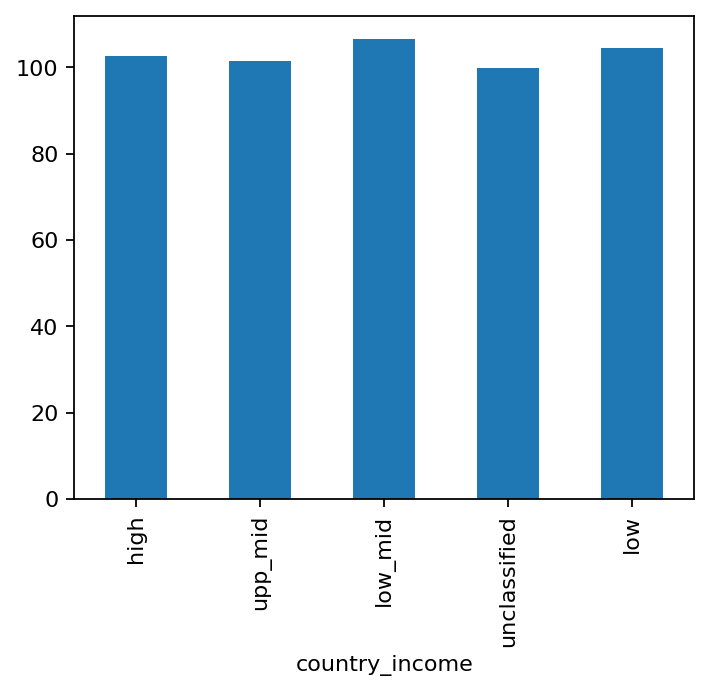

In [110]:
plt.figure(figsize=(5, 4), dpi=160)
movie_df.groupby("country_income", sort=False)["duration_num"].mean().plot(kind="bar")
plt.show()

### I've not found any interesting results. However I've had a lot of fun with this data set...